# Deep Learning for Statisticians: Interactive Coding

## Today’s flow
1. Coding with ChatGPT
2. Python & key ML libraries
3. High-level overview of ML workflow
4. Simple classification models (scikit-learn)
5. Image classification: CNN on MNIST (PyTorch)
6. GAN & VAE generative models
7. Tips & next steps

## - Coding with ChatGPT
- Why ChatGPT works well?

    - It’s a language model, good at translating.

    - Programing languages are languages.
- How to use ChatGPT?

    - From code to natural language

    - From natural language to code

    - Be cautious with generated code


## - Python & key ML libraries

In [28]:
# Install and import
# library(packages) in R
!pip install torch torchvision scikit-learn pandas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets, model_selection, metrics
from sklearn.linear_model import LogisticRegression

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as T

## - High-level overview of ML workflow
 1. Load the data

 2. Define the model

 3. Define your loss function

 4. Choose your optimizer

 5. Training loop: gradient descent

 6. Evaluate on test (or validation) data


## 🌸 Simple Classification with scikit-learn

### 🧬 Iris Dataset Overview

The Iris dataset is a classic benchmark dataset in machine learning and statistics.
It contains **150 samples** of iris flowers, divided evenly among **three species**:

- *Iris setosa*
- *Iris versicolor*
- *Iris virginica*

Each flower sample includes **4 numeric features**:

1. **Sepal length** (in cm)
2. **Sepal width** (in cm)
3. **Petal length** (in cm)
4. **Petal width** (in cm)

The goal is to build a **classification model** that can **predict the species** of a flower based on these 4 features.

---

### 🎯 Problem Setting

This is a **multi-class classification** task with the following setup:

- **Input (X):** The 4-dimensional feature vector representing the flower.
- **Output (y):** The class label indicating the flower species (0, 1, or 2).
- **Goal:** Learn a model that maps features → species.

We will use **logistic regression** as our first classifier, implemented via `scikit-learn`.

Before building the model, let’s first visualize the dataset to understand how well the species can be separated based on feature combinations.

### Step 1: Load the Data


In [29]:
from sklearn import datasets, model_selection, metrics
X, y = datasets.load_iris(return_X_y=True)
feature_names = datasets.load_iris().feature_names
target_names = datasets.load_iris().target_names


### Visualize the dataset

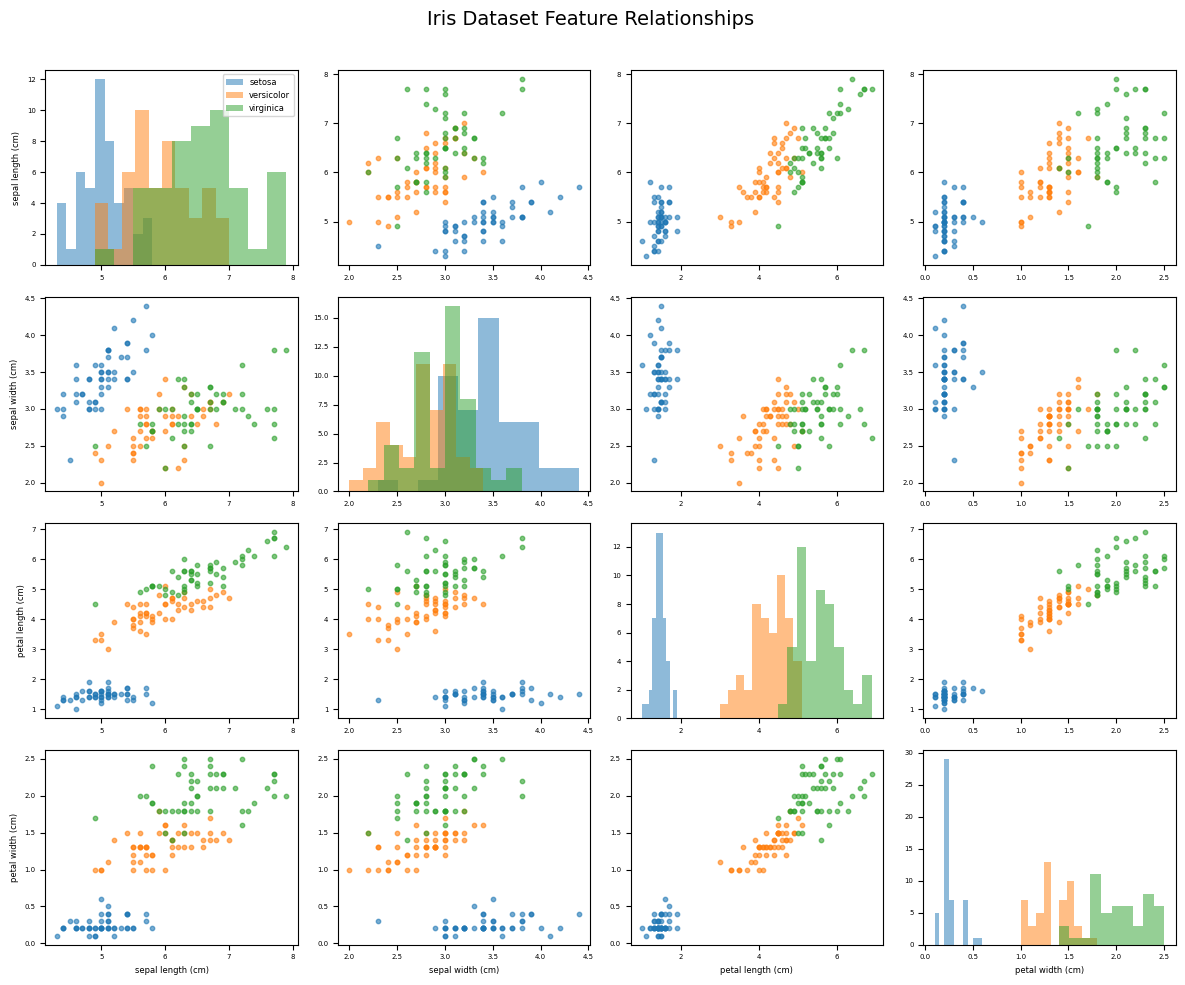

In [30]:
import pandas as pd
# Create a DataFrame for easier visualization
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = df['target'].map(dict(enumerate(target_names)))

# Pairplot-style scatter plots to visualize distributions
plt.figure(figsize=(12, 10))
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i * 4 + j + 1)
        if i == j:
            for label in np.unique(y):
                plt.hist(df[df['target'] == label][feature_names[i]], alpha=0.5, label=target_names[label])
            if i == 0:
                plt.legend(loc='upper right', fontsize=6)
        else:
            for label in np.unique(y):
                plt.scatter(df[df['target'] == label][feature_names[j]],
                            df[df['target'] == label][feature_names[i]],
                            alpha=0.6, s=10, label=target_names[label] if i == 0 and j == 0 else "")
        if i == 3:
            plt.xlabel(feature_names[j], fontsize=6)
        if j == 0:
            plt.ylabel(feature_names[i], fontsize=6)
        plt.xticks(fontsize=5)
        plt.yticks(fontsize=5)
plt.suptitle("Iris Dataset Feature Relationships", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### Step 2: Define the Model
### Step 3: Define the Loss Function
### Step 4: Choose the Optimizer



In [31]:
# Define model: Logistic Regression (multinomial)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=200)

### Step 5: Training Loop

In [32]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=200)

### Step 6: Evaluate on Test Data

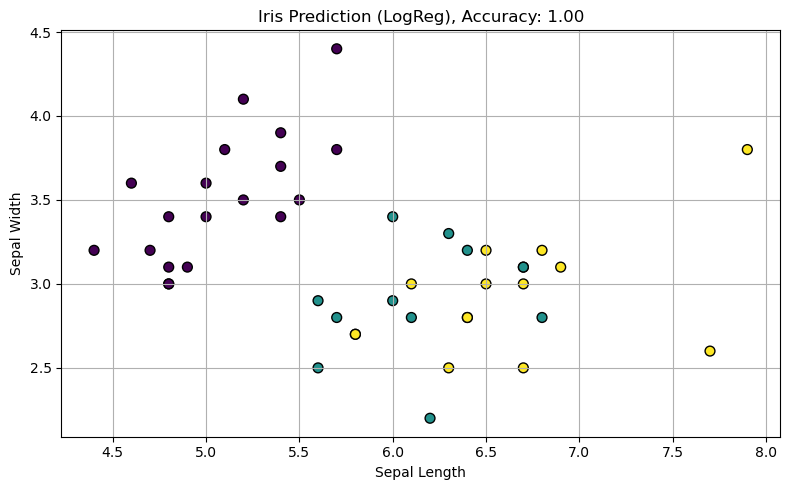

In [33]:
# Evaluate on test data
pred = clf.predict(X_test)
acc = metrics.accuracy_score(y_test, pred)
report = metrics.classification_report(y_test, pred, output_dict=True)

# Visualize predictions
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred, cmap='viridis', edgecolor='k', s=50)
plt.title(f"Iris Prediction (LogReg), Accuracy: {acc:.2f}")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid(True)
plt.tight_layout()
plt.show()

## - Image classification: a simple CNN (PyTorch)
### Step 1: Load the Data

We download the MNIST dataset and prepare it for training and testing using PyTorch's `DataLoader`.
We also apply two preprocessing steps:
- Convert images to tensors (`ToTensor`)
- Normalize pixel values to [-1, 1] range using `Normalize`



In [34]:
import torch
import torchvision
import torchvision.transforms as T

# Define transform: convert to tensor and normalize
transform = T.Compose([T.ToTensor(), T.Normalize((0.5,), (0.5,))])

# Load MNIST training and test sets
train_ds = torchvision.datasets.MNIST('.', train=True, download=True, transform=transform)
test_ds  = torchvision.datasets.MNIST('.', train=False, transform=transform)

# DataLoaders
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = torch.utils.data.DataLoader(test_ds, batch_size=1000, shuffle=False)

### Visualize the MNIST Dataset

Let’s take a quick look at a few images from the MNIST training set to get a sense of the data we’re working with.
Each image is a 28x28 grayscale digit (0–9).


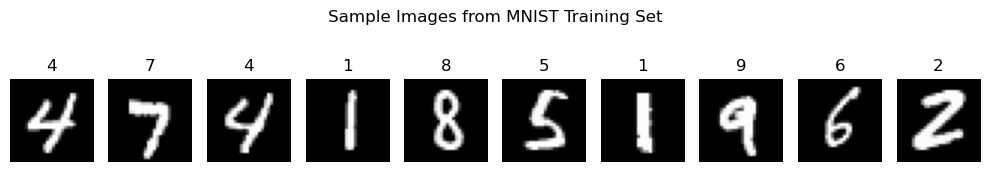

In [35]:
import matplotlib.pyplot as plt

# Visualize 10 sample images from training set
images, labels = next(iter(train_loader))

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(images[i][0], cmap="gray")
    plt.title(labels[i].item())
    plt.axis("off")

plt.suptitle("Sample Images from MNIST Training Set")
plt.tight_layout()
plt.show()


### Step 2: Define the Model

We define a small CNN using PyTorch's `nn.Module`.
The network consists of:
- Two convolutional layers with ReLU and max pooling
- Two fully connected layers to classify into 10 digit classes

In [36]:
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, 128), nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.fc(self.conv(x))

# Move model to device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN().to(device)

### Step 3: Define the Loss Function
We use **Cross-entropy loss** for multi-class classification


In [37]:
loss_fn = nn.CrossEntropyLoss()

### Step 4: Choose the Optimizer
We use **Adam optimizer** for gradient descent

In [38]:
opt = optim.Adam(model.parameters(), lr=1e-3)

### Step 5: Train the Model

Each batch of images and labels is passed through the model, and the loss is backpropagated to update weights.


In [39]:
# Training loop
model.train()
for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)

    # Forward pass
    outputs = model(images)
    loss = loss_fn(outputs, labels)

    # Backward pass and optimization
    opt.zero_grad()
    loss.backward()
    opt.step()

### Step 6: Evaluate on Test Data

In [40]:
# Evaluation loop
model.eval()
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        preds = model(images).argmax(dim=1)
        correct += (preds == labels).sum().item()

# Print accuracy
accuracy = correct / len(test_ds)
print(f"MNIST CNN accuracy: {accuracy:.2f}")

MNIST CNN accuracy: 0.98


### Visualize Model Predictions

We now visualize a few predictions made by the model on test data.
This helps us understand what kinds of digits the model gets right or wrong.


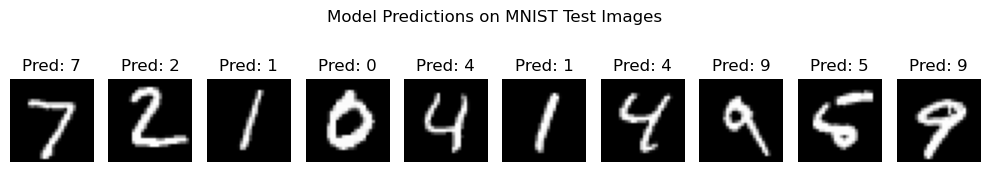

In [41]:
# Get a batch of test data
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)

# Predict and move to CPU for plotting
model.eval()
with torch.no_grad():
    preds = model(images).argmax(dim=1)

# Plot 10 predictions
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(images[i].cpu()[0], cmap="gray")
    plt.title(f"Pred: {preds[i].item()}")
    plt.axis("off")

plt.suptitle("Model Predictions on MNIST Test Images")
plt.tight_layout()
plt.show()


## - Generative model: simple GAN on MNIST

### Step 1: Load the Data

We use the MNIST dataset, where each image is a 28x28 grayscale handwritten digit.
We flatten the image into a 784-dimensional vector to feed into fully connected networks.


In [42]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt

# Load MNIST and normalize to [-1, 1]
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST('.', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Step2: Define the Model

A GAN has two models:
- **Generator (G):** Takes random noise as input and generates an image.
- **Discriminator (D):** Takes an image and predicts whether it is real or generated.

We use simple fully connected layers for both.


In [43]:
# Generator network
class Generator(nn.Module):
    def __init__(self, g_input_dim, g_output_dim):
        super().__init__()
        self.fc1 = nn.Linear(g_input_dim, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, g_output_dim)

    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), 0.2)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = F.leaky_relu(self.fc3(x), 0.2)
        return torch.tanh(self.fc4(x))

# Discriminator network
class Discriminator(nn.Module):
    def __init__(self, d_input_dim):
        super().__init__()
        self.fc1 = nn.Linear(d_input_dim, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 1)

    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), 0.2)
        x = F.dropout(x, 0.3)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = F.dropout(x, 0.3)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = F.dropout(x, 0.3)
        return torch.sigmoid(self.fc4(x))

### Step 3: Define the Loss Function

We use **binary cross-entropy loss** to:
- Train the discriminator to classify real vs. fake images
- Train the generator to fool the discriminator

In [44]:
criterion = nn.BCELoss()

### Step 4: Choose the Optimizer

We use the **Adam optimizer** for both the generator and discriminator.


In [45]:
z_dim = 100
mnist_dim = 28 * 28

G = Generator(z_dim, mnist_dim).to(device)
D = Discriminator(mnist_dim).to(device)

G_optimizer = optim.Adam(G.parameters(), lr=0.0002)
D_optimizer = optim.Adam(D.parameters(), lr=0.0002)

### Step 5: Train the Model

For each batch:
1. Train the discriminator on both real and fake images
2. Train the generator to produce more realistic images

We repeat this for multiple epochs.

In [46]:
def D_train(x):
    D.zero_grad()

    # Train on real
    x_real = x.view(-1, mnist_dim).to(device)
    y_real = torch.ones(x.size(0), 1).to(device)
    D_real_loss = criterion(D(x_real), y_real)

    # Train on fake
    z = torch.randn(x.size(0), z_dim).to(device)
    x_fake = G(z)
    y_fake = torch.zeros(x.size(0), 1).to(device)
    D_fake_loss = criterion(D(x_fake), y_fake)

    # Combine and update
    D_loss = D_real_loss + D_fake_loss
    D_loss.backward()
    D_optimizer.step()

    return D_loss.item()

def G_train():
    G.zero_grad()

    z = torch.randn(100, z_dim).to(device)
    y = torch.ones(100, 1).to(device)

    G_loss = criterion(D(G(z)), y)
    G_loss.backward()
    G_optimizer.step()

    return G_loss.item()


In [47]:
# Training loop
n_epochs = 20
for epoch in range(1, n_epochs + 1):
    D_losses, G_losses = [], []
    for batch_idx, (x, _) in enumerate(train_loader):
        D_losses.append(D_train(x))
        G_losses.append(G_train())

    print(f"[{epoch}/{n_epochs}] D_loss: {torch.tensor(D_losses).mean():.4f}, G_loss: {torch.tensor(G_losses).mean():.4f}")


[1/20] D_loss: 0.5145, G_loss: 4.7401
[2/20] D_loss: 0.1955, G_loss: 10.9210
[3/20] D_loss: 0.7054, G_loss: 3.8521
[4/20] D_loss: 0.6938, G_loss: 2.9645
[5/20] D_loss: 0.4986, G_loss: 2.9950
[6/20] D_loss: 0.3785, G_loss: 3.6415
[7/20] D_loss: 0.4359, G_loss: 3.2893
[8/20] D_loss: 0.5204, G_loss: 2.9716
[9/20] D_loss: 0.5440, G_loss: 2.7402
[10/20] D_loss: 0.6036, G_loss: 2.5608
[11/20] D_loss: 0.6281, G_loss: 2.4006
[12/20] D_loss: 0.7525, G_loss: 2.0615
[13/20] D_loss: 0.7959, G_loss: 1.8907
[14/20] D_loss: 0.8023, G_loss: 1.8521
[15/20] D_loss: 0.8213, G_loss: 1.8312
[16/20] D_loss: 0.8234, G_loss: 1.8617
[17/20] D_loss: 0.8274, G_loss: 1.8534
[18/20] D_loss: 0.7830, G_loss: 1.9609
[19/20] D_loss: 0.8314, G_loss: 1.8156
[20/20] D_loss: 0.8551, G_loss: 1.7412


### Step 6: Evaluate the Model

After training, we can generate new images by sampling random noise and passing it through the generator.


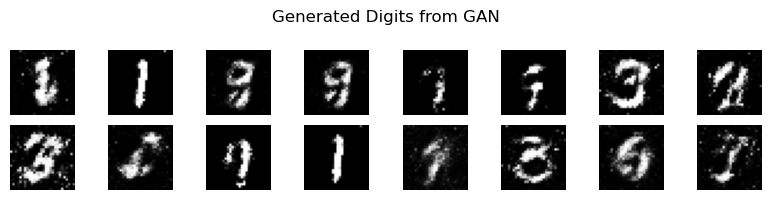

In [48]:
# Generate images
G.eval()
z = torch.randn(16, z_dim).to(device)
gen_imgs = G(z).view(-1, 28, 28).cpu().detach()

# Plot results
plt.figure(figsize=(8, 2))
for i in range(16):
    plt.subplot(2, 8, i + 1)
    plt.imshow(gen_imgs[i], cmap="gray")
    plt.axis("off")
plt.suptitle("Generated Digits from GAN")
plt.tight_layout()
plt.show()


## - Generative model: simple VAE on MNIST

### Step 1: Load the Data

We use the MNIST dataset where each image is a 28x28 grayscale digit.
For VAE training, we flatten the image into a 784-dimensional vector.


In [50]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Data loading
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST('.', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('.', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


### Step 2: Define the Model

The VAE consists of:
- An **encoder**: maps input to mean and log-variance vectors.
- A **reparameterization** step: samples latent variable from the posterior.
- A **decoder**: maps the latent variable back to the input space.

The latent space is 2-dimensional to allow visualization of the learned manifold.


In [51]:
class VAE(nn.Module):
    def __init__(self, x_dim, h_dim1, h_dim2, z_dim):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(x_dim, h_dim1)
        self.fc2 = nn.Linear(h_dim1, h_dim2)
        self.fc31 = nn.Linear(h_dim2, z_dim)
        self.fc32 = nn.Linear(h_dim2, z_dim)

        self.fc4 = nn.Linear(z_dim, h_dim2)
        self.fc5 = nn.Linear(h_dim2, h_dim1)
        self.fc6 = nn.Linear(h_dim1, x_dim)

    def encoder(self, x):
        h = F.relu(self.fc1(x))
        h = F.relu(self.fc2(h))
        return self.fc31(h), self.fc32(h)  # mu, log_var

    def sampling(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return eps * std + mu

    def decoder(self, z):
        h = F.relu(self.fc4(z))
        h = F.relu(self.fc5(h))
        return torch.sigmoid(self.fc6(h))

    def forward(self, x):
        mu, log_var = self.encoder(x.view(-1, 784))
        z = self.sampling(mu, log_var)
        return self.decoder(z), mu, log_var

# Initialize model
vae = VAE(x_dim=784, h_dim1=512, h_dim2=256, z_dim=2).to(device)


### Step 3: Define the Loss Function

The VAE loss consists of two components:
- **Reconstruction loss**: binary cross-entropy between input and output
- **KL divergence**: regularizes the latent distribution toward a standard normal


In [52]:
def loss_function(recon_x, x, mu, log_var):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return BCE + KLD

### Step 4: Choose the Optimizer

We use Adam optimizer to minimize the total VAE loss.


In [53]:
optimizer = optim.Adam(vae.parameters())

### Step 5: Train the Model

For each training batch:
1. Forward pass through VAE
2. Compute reconstruction and KL losses
3. Backpropagate and update parameters


In [54]:
def train(epoch):
    vae.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()

        recon_batch, mu, log_var = vae(data)
        loss = loss_function(recon_batch, data, mu, log_var)

        loss.backward()
        train_loss += loss.item()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item() / len(data):.4f}')

    print(f'====> Epoch: {epoch} Average loss: {train_loss / len(train_loader.dataset):.4f}')


### Step 6: Evaluate the Model

We evaluate the model on the test set and compute the average loss.


In [55]:
def test():
    vae.eval()
    test_loss = 0
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.to(device)
            recon, mu, log_var = vae(data)
            test_loss += loss_function(recon, data, mu, log_var).item()

    test_loss /= len(test_loader.dataset)
    print(f'====> Test set loss: {test_loss:.4f}')

In [56]:
# Train for a few epochs
for epoch in range(5):
    train(epoch)
    test()

Train Epoch: 0 [0/60000 (0%)]	Loss: 544.8441
Train Epoch: 0 [12800/60000 (21%)]	Loss: 173.9579
Train Epoch: 0 [25600/60000 (43%)]	Loss: 170.5432
Train Epoch: 0 [38400/60000 (64%)]	Loss: 163.9414
Train Epoch: 0 [51200/60000 (85%)]	Loss: 156.7193
====> Epoch: 0 Average loss: 180.1613
====> Test set loss: 163.7380
Train Epoch: 1 [0/60000 (0%)]	Loss: 161.9318
Train Epoch: 1 [12800/60000 (21%)]	Loss: 166.4711
Train Epoch: 1 [25600/60000 (43%)]	Loss: 163.7332
Train Epoch: 1 [38400/60000 (64%)]	Loss: 162.2472
Train Epoch: 1 [51200/60000 (85%)]	Loss: 151.7016
====> Epoch: 1 Average loss: 159.0421
====> Test set loss: 156.3050
Train Epoch: 2 [0/60000 (0%)]	Loss: 156.2201
Train Epoch: 2 [12800/60000 (21%)]	Loss: 153.1573
Train Epoch: 2 [25600/60000 (43%)]	Loss: 154.3336
Train Epoch: 2 [38400/60000 (64%)]	Loss: 155.3751
Train Epoch: 2 [51200/60000 (85%)]	Loss: 147.2769
====> Epoch: 2 Average loss: 153.6664
====> Test set loss: 152.3999
Train Epoch: 3 [0/60000 (0%)]	Loss: 152.5970
Train Epoch: 3 [

### Sampling from the VAE

To generate samples from the model, we sample random vectors from the standard normal distribution and decode them using the trained decoder.


In [57]:
def generate_VAE_samples(model, dim, num_samples=10, device=device):
    model.eval()
    noise = torch.randn(num_samples, dim, device=device)
    with torch.no_grad():
        samples = model.decoder(noise)
    return samples.view(-1, 28, 28).cpu().numpy()


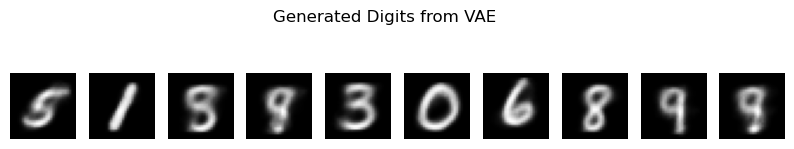

In [58]:
# Generate and visualize samples
vae_samples = generate_VAE_samples(model=vae, dim=2)

plt.figure(figsize=(10, 2))
for i in range(len(vae_samples)):
    plt.subplot(1, 10, i + 1)
    plt.imshow(vae_samples[i], cmap='gray')
    plt.axis("off")
plt.suptitle("Generated Digits from VAE")
plt.show()

## - Recap: High-level overview of ML workflow

 1. Load the data

 2. Define the model

 3. Define your loss function

 4. Choose your optimizer

 5. Training loop: gradient descent

 6. Evaluate on test (or validation) data

# - Wrap‑up & next steps

**1. Get your hands dirty.**

The best way to learn coding is coding.

Play with the model, adjust hyperparameters, and see how it affects performance.

**2. Use ChatGPT—but verify.**

ChatGPT can generate boilerplate, but always check that it matches *your* data and objectives.

**3. Version control with Git.**

Even notebooks benefit from `git init` → `git add` → `git commit` → pushing to GitHub.